# Image Enhancement
## Introduction
 
>  __The filter enhances the quality of image so that important details can be visualized and
quantified.__

> __Image Enchancement  techniques transform the pixel values in the input
image to a new value in the output image using a mapping function.
We discuss logarithmic transformation, power law transformation, image inverse, histogram equalization, and contrast stretching.__
***

## Pixel Transformation
A transformation is a function that maps set of inputs to set of outputs so that each input has has exactly one output.
* In the case of images, a transformation takes the pixel intensities of the image as an input and creates a new image where the corresponding pixel intensities are defined by the transformation.*

    e.g *T(x) = x+50*



## Image Inverse
Image inverse transformation is a linear transformation. The goal is to transform the dark intensities in the input image to bright intensities in the output image and vice versa.If the range of intensities is [0,L-1] for the input image, then the image inverse transformation at *(i,j)* is given by

                $t(i,j) = L-1-I(i,j)$
                

## Powe Law Transformation
Power law transformation, also known as gamma-correction, is used to enhance the quality of the image.
- The power transformation at *(i, j)* is given by

                    $t(i, j) = k I(i, j)^γ$
                    


91.0


C:\Users\jawad\AppData\Local\Temp/ipykernel_4840/2271487589.py:30: RuntimeWarning: divide by zero encountered in log
  b3 = np.log(b2)*gamma


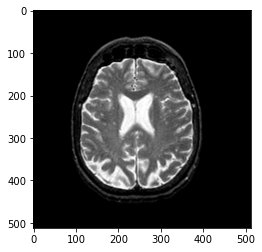

In [23]:
# Gamma correction
import numpy as np
import scipy.misc 
from  PIL import Image
import matplotlib.pyplot as plt
# Opening and converting the image into greyscale

# a = Image.open('../../Images/Images/15.gif').convert('L')
a = Image.open('../../Images/Images/15.gif')
# Showing the image
plt.imshow(a)

#initialize the gamma
gamma = 5
# a is converted into an ndarray
b = np.asarray(a)

# #convert a to type float
b1 = b.astype(float)

# Maximum value in b1 is determine
b3 = np.max(b1)
print(b3)

# b1 is normalizaed
b2 = b1/b3

# gamma correction exponenet is computed

b3 = np.log(b2)*gamma

# gamma correction is performed

c = np.exp(b3)*255.0

# c is converted to type int
c1 = c.astype(int)


# c1 is converted from ndaraay to image
d = Image.fromarray(c1)

In [25]:
d.show()
d.save('outputFilterImages/gamme_correction.png')

### Log Transformation
Log transformation is used to enhance pixel intensities that are otherwise missed due to a wide range of intensity values or lost at the expense of high intensity values. If the intensities in the image range from [0, L − 1]


then the log transformation at *(i, j)* is given by

            $t(i, j) = k log(1 + I(i, j))$
            
**The Inverse Log Transformation does the opposite of log transformation**

91.0


C:\Users\jawad\AppData\Local\Temp/ipykernel_4840/2297293111.py:25: RuntimeWarning: invalid value encountered in true_divide
  c = (255.0*np.log(1+b1))/np.log(1+b2)


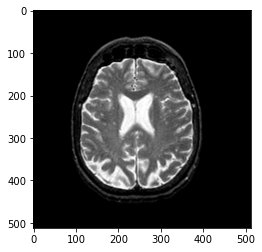

In [26]:

# log transformation

import numpy as np
import scipy.misc 
from  PIL import Image
import matplotlib.pyplot as plt
# Opening and converting the image into greyscale

# a = Image.open('../../Images/Images/15.gif').convert('L')
a = Image.open('../../Images/Images/15.gif')
# Showing the image
plt.imshow(a)

# a is converted into an ndarray
b = np.asarray(a)

# #convert a to type float
b1 = b.astype(float)

# Maximum value in b1 is determine
b3 = np.max(b1)
print(b3)

# performing the log transformatin
c = (255.0*np.log(1+b1))/np.log(1+b2)

# c is converted to type int
c1 = c.astype(int)


# c1 is converted from ndaraay to image
d = Image.fromarray(c1)
d.save('outputFilterImages/logtransfrom.png')

In [27]:
d.show()

## Histogram Equalization
The histogram of an image is a discrete function, its input is the gray level value and the output is the number of pixels with that gray level value and can be given as *$h(xn) = yn.$*

> In a grayscale image, the
intensities of the image take values between [0, L−1]. As discussed earlier, low gray level values in the image (the left side of the histogram)
correspond to dark regions and high gray level values in the image (the
right side of the histogram) correspond to bright regions.

> In a low contrast image, the histogram is narrow, whereas in a high
contrast image, the histogram is spread out. In histogram equalization,
the goal is to improve the contrast of an image by rescaling the histogram so that the histogram of the new image is spread out and the
pixel intensities range over all possible gray level values. The rescaling of the histogram will be performed by using a transformation. To
ensure that for every gray level value in the input image there is a
corresponding output, a one-to-one transformation is required; that is
every input has a unique output. This means the transformation should
be an increasing function. This will ensure that the transformation is
invertible.




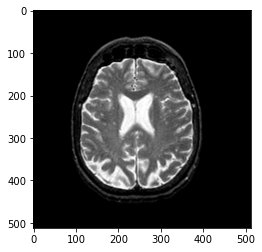

In [32]:

import numpy as np
import scipy.misc 
from  PIL import Image
import matplotlib.pyplot as plt
# Opening and converting the image into greyscale

# a = Image.open('../../Images/Images/15.gif').convert('L')
a = Image.open('../../Images/Images/15.gif')
# Showing the image
plt.imshow(a)

# a is converted into an ndarray
b = np.asarray(a)
# print(b)
# 2D array is converted to an 1D
f1 = b.flatten()
# print(f1)

# historgram and bins of the image are computed

hist, bins = np.histogram(b,256,[0,255])

# Comulative distribution function is computed
cdf = hist.cumsum()

# Places where cdf=0 is masked or ignored and rest is stored in cdf_m

cdf_m = np.ma.masked_equal(cdf,0)

# historgram equalization is perfromed
num_cdf_m  = (cdf_m-cdf_m.min())*255

den_cdf_m = (cdf_m.max()-cdf_m.min())

cdf_m = num_cdf_m/den_cdf_m

# The masked places in cdf_m are now 0

cdf = np.ma.filled(cdf_m,0).astype('uint8')

# cdf values are assigned in the flattened array
im2 = cdf[f1]

# im2 is 1D so we use reshape command to make it into 2D
im3 = np.reshape(im2,b.shape)


# converting im3 to an image

im4 = Image.fromarray(im3)



In [33]:
im4.show()

In [34]:
im4.save('outputFilterImages/histogram_equ.png')

## Contrast Stretching
> Contrast stretching is similar in idea to histogram equalization except that the pixel intensities are rescaled using the pixel values instead of probabilities and cdf. Contrast stretching is used to increase the pixel value range by rescaling the pixel values in the input image.



Min pixel = 255, Max pixel = 0


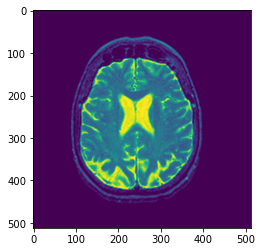

In [40]:
import numpy as np
import scipy.misc 
from  PIL import Image
import matplotlib.pyplot as plt
# Opening and converting the image into greyscale

a = Image.open('../../Images/Images/15.gif').convert('L')
# a = Image.open('../../Images/Images/15.gif')
# Showing the image
plt.imshow(a)

# a is converted into an ndarray
im1 = np.asarray(a)

# Finding the min and max pixel values
b = im1.max()
a = im1.min()

print(f"Min pixel = {b}, Max pixel = {a}")

# Converting im1 to float
c = im1.astype(float)

# contrast streching transformation
im2 = 255*(c-a)/(b-a)

# im2 is converted from an ndarray to an image

im3 = Image.fromarray(im2)

# Save the transformed image

# im3.save('outputFilterImages/contrast_streching.png')

In [41]:
im3.show()


# Summary
* Image inverse transformation is used to invert the pixel intensities in an image. This process is similar to obtaining a negative of a photograph.
* Power law transformation makes the image brighter for γ < 1 and darker for γ > 1.
* Log transformation makes the image brighter, while the inverse log makes the image darker.
* Histogram equalization is used to enhance the contrast in an image. In this transformation, a narrow range of intensity values will get mapped to a wide range of intensity values.
* Contrast stretching is used to increase the pixel value range by rescaling the pixel values in the input image.

## The End of chpt 5